In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

In [2]:
def rl(x):
    return np.maximum(x,0)

def evolve(I, W, b, alpha=0.01):
    steps = len(I[0, :])
    for ii in range(1,steps):
        I[:,ii] = (1-alpha)*I[:,ii-1] + alpha*(W.dot(rl(I[:,ii-1])) + b)

In [16]:
def neuronplot(I, neuron=0, color='k', rl=False):
    X = I[neuron, :]
    if rl:
        X = rl(X)
    plt.plot(X)
    
def phaseplot(I, neurons=(0,1), color='k', rl=False):
    X = I[neurons[0], :]
    Y = I[neurons[1], :]
    if rl:
        X = rl(X)
        Y = rl(Y)
    plt.plot(X, Y, color=color)
    
def show_neuron_space(W, b, inits, neuron=0):
    colors = ['r','b','g','m','c','y','k']
    for num, init in enumerate(inits):
        I[:, 0] = np.array(init)
        evolve(I, W, b)
        neuronplot(I, neuron=neuron, color=colors[num])
    
def directedphaseplot(I, b, num=50, color='k', neurons=(0,1), withBias=False):
    i1 = neurons[0]; i2 = neurons[1]
    x = I[i1, :]; y = I[i2, :]
    if withBias:
        x += b[i1]; y += b[i2]

    steps = len(x)
    skip = steps/num
    x = x[::skip]; y = y[::skip]
    plt.quiver(x[:-1], y[:-1], x[1:]-x[:-1], y[1:]-y[:-1], scale_units='xy', angles='xy', scale=1, color=color)

def directedphaseplot3D(I, B, ax, num=200, color='k', neurons=(0,1,2), withBias=False):
    i1 = neurons[0]; i2 = neurons[1]; i3 = neurons[2]
    x = I[i1, :]; y = I[i2, :]; z = I[i3, :]
    if withBias:
        x += b[i1]; y += b[i2]; z += b[i3]
    steps = len(x)
    skip = steps/num
    x = x[::skip]; y = y[::skip]; z = z[::skip]
    ax.quiver(x[:-1], y[:-1], z[:-1], (x[1:]-x[:-1]), (y[1:]-y[:-1]), (z[1:]-z[:-1]),
                    color=color)
    


In [15]:
def show_phase_space(W, b, inits, withBias=False, scheme="2D"):
    if scheme=="2D":
        show_phase_plane(W, b, inits, withBias=withBias)
    elif scheme=="3D":
        show_phase_volume(W, b, inits, withBias=withBias)
    else:
        print "scheme " + scheme + " does not exist."
    

def show_phase_plane(W, b, inits, withBias=False):
    colors = ['r','b','g','m','c','y','k']
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')
    plt.axes().set_aspect('equal')
    
    for num, init in enumerate(inits):
        I[:, 0] = np.array(init)
        evolve(I, W, b)
        plt.axes().set_aspect('equal', 'datalim')
        directedphaseplot(I, b, color=colors[num], withBias=withBias)
    
def show_phase_volume(W, b, inits, num=200, withBias=False):
    colors = ['r','b','g','m','c','y','k']
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    for i, init in enumerate(inits):
        I[:, 0] = np.array(init)
        evolve(I, W, b)
        directedphaseplot3D(I, b, ax, num=num, color=colors[i], withBias=withBias)

def show_inhibitory_space(W, b, inits):
    colors = ['r','b','g','m','c','y','k']
    for num, init in enumerate(inits):
        I[:, 0] = np.array(init)
        evolve(I, W, b)
        neuronplot(I, neuron=2, color=colors[num])

In [21]:
W = np.zeros([3,3])
steps = 500
alpha = .01
I = np.zeros([np.shape(W)[0],steps])

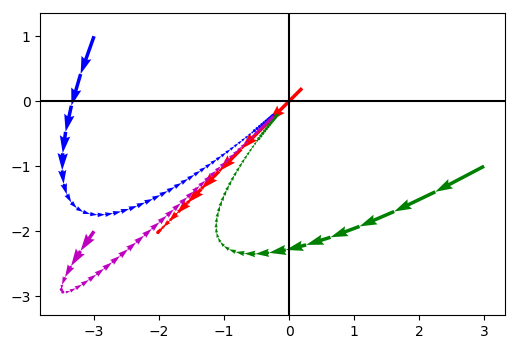

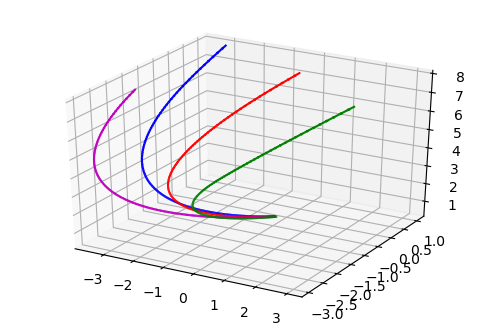

In [60]:
w1 = w2 = .1; w3=.1;
w31 = w32 = -.7; 
w13 = w23 = -.7; 
b1 = b2 =.2;
b3 = .2;


# Neurons weights
W[0,0] = w1; W[1,1] = w2; W[2, 2] = w3;
W[0,2] = w13; W[2,0] = w31;
W[1,2] = w23; W[2, 1] = w32;

# Biases:
b = np.array([b1, b2, b3])
x3_init = 8
inits = [[.2,.2, x3_init],[-3, 1, x3_init], [3, -1, x3_init], [-3, -2, x3_init]]
# I[:,0] = init

show_phase_plane(W, b, inits)
show_phase_volume(W, b, inits)

# evolve(I, W, b, alpha=alpha)

# directedphaseplot(I, b)
# plt.show()